### 목표
- 선형회귀 모델 클래스를 이용해보자.
- MSE(Mean Squared Error) 평균제곱오차를 이해해보자.
- 경사하강법을 이해해보자.
- 회귀모델의 평가지표를 이해해보자.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
score_data = pd.DataFrame([[2,20],[4,40],[8,80],[9,90]],
                         columns=['공부시간','성적'])
score_data

,공부시간,성적
0,2,20
1,4,40
2,8,80
3,9,90


In [3]:
X = score_data[['공부시간']]
y = score_data['성적']

#### 1. 수학 공식을 이용한 해석적 방법(OLS)

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
# 모델생성
linear_model = LinearRegression()

In [6]:
# 모델학습
linear_model.fit(X,y)

LinearRegression()

In [7]:
# 모델예측
linear_model.predict([[7]])

c:\Users\SMHRD\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([70.])

In [8]:
# 가중치 확인
print("가중치", linear_model.coef_)
# 절편 확인
print("절편", linear_model.intercept_)

가중치 [10.]
절편 7.105427357601002e-15


#### 2. 경사하강법을 이용하는 모델

In [9]:
from sklearn.linear_model import SGDRegressor

In [10]:
# 모델생성
sgd_model = SGDRegressor()

In [11]:
# 모델학습
sgd_model.fit(X,y)

SGDRegressor()

In [12]:
# 모델예측
sgd_model.predict([[7]])

c:\Users\SMHRD\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDRegressor was fitted with feature names
  warnings.warn(


array([70.04042996])

In [13]:
# 가중치 확인
print("가중치", sgd_model.coef_)
# 절편 확인
print("절편", sgd_model.intercept_)

가중치 [9.84394196]
절편 [1.13283624]


#### 2.2 가중치(w)변화에 따른 MSE(loss)변화 그래프 확인

In [14]:
# 선형모델 기본함수
def h(x,w):
    return x * w + 0

In [15]:
# MSE함수
def MSE(x,y,w):
    # 실제값과 예측값의 차이 -> 오차
    pre_y = h(x,w)
    error = y - pre_y
    # 오차를 제곱해서 평균
    mse = (error ** 2).mean()
    return mse

In [16]:
MSE(score_data['공부시간'],score_data['성적'],5)

1031.25

In [17]:
w_list = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])

In [18]:
mse_list =[MSE(score_data['공부시간'],score_data['성적'],w) for w in w_list]

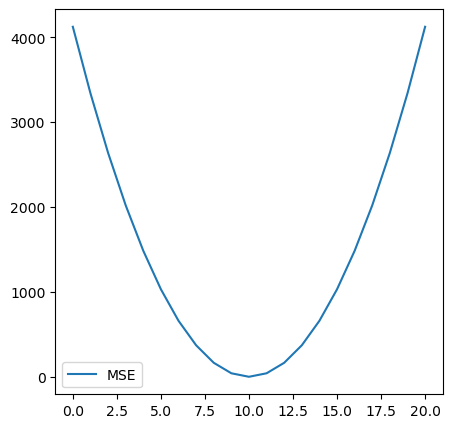

In [19]:
plt.figure(figsize=(5,5))
plt.plot(w_list, mse_list, label='MSE')
plt.legend()
plt.show()

#### 3. 호주 집 가격 데이터 셋 예측
- 데이터 로드
- 입력특성 5개 선택
    - 수치데이터면서 결측치가 없는 것만 5개
    - 결측치 처리, 인코딩처리를 포함해서 5개
- LinearRegression, SGDRegressor 모델 학습 및 평가
    - 문제, 답 분리
    - 훈련용, 평가용 분리
    - 모델 생성 및 학습
    - score함수 이용해서 평가점수 확인

In [20]:
# 데이터로드
house_data = pd.read_csv("./data/melb_data.csv")
house_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [21]:
# 요약정보 확인
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [22]:
# 기술통계정보 확인
house_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [23]:
# 상관관계 확인
house_data.corr()['Price'].sort_values()

YearBuilt       -0.323617
Lattitude       -0.212934
Distance        -0.162522
Propertycount   -0.042153
Landsize         0.037507
BuildingArea     0.090981
Postcode         0.107867
Longtitude       0.203656
Car              0.238979
Bathroom         0.467038
Bedroom2         0.475951
Rooms            0.496634
Price            1.000000
Name: Price, dtype: float64

##### Type 확인

In [24]:
house_data['Type'].unique()

array(['h', 'u', 't'], dtype=object)

<AxesSubplot:xlabel='Type'>

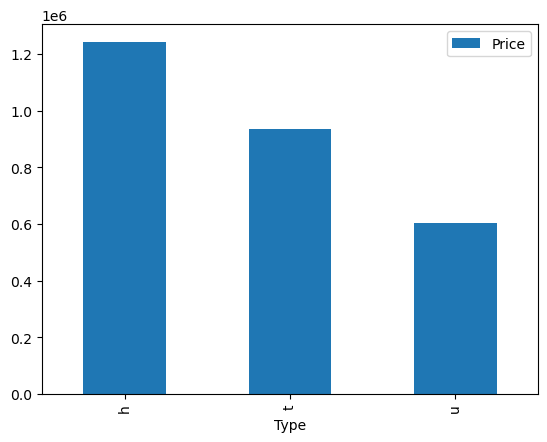

In [25]:
house_data[['Type','Price']].groupby(['Type']).mean().plot(kind='bar')

In [26]:
# !pip install folium

     -------------------------------------- 102.3/102.3 kB 5.8 MB/s eta 0:00:00


In [27]:
import folium

In [50]:
mean_long = house_data['Longtitude'].mean()
mean_lat = house_data['Lattitude'].mean()

In [53]:
m = folium.Map(location=[mean_lat,mean_long],
              zoom_start=17,
              width=750, height=500)
for lat,long in zip(house_data['Lattitude'],house_data['Longtitude']):
    folium.Marker([lat,long]).add_to(m)
m

#### 3.1 모델링



In [28]:
# 특성선택 (결측치 없고 숫자 형태의 특성을 모델에 넣어 학습 시킬 수 있다.)
# 필요시 전처리 할 것 (결측치처리, 인코딩 등)
feature_names = ['Rooms', 'Bedroom2', 'Bathroom', 'Lattitude', 'Distance']

In [29]:
# 문제
X = house_data[feature_names]
y = house_data['Price']

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=428)

In [32]:
print("훈련용 문제 X: ", X_train.shape, "훈련용 답 y: ",  y_train.shape)
print("테스트용 문제 X: ", X_test.shape, "테스트용 답 y: ", y_test.shape)

훈련용 문제 X:  (9506, 5) 훈련용 답 y:  (9506,)
테스트용 문제 X:  (4074, 5) 테스트용 답 y:  (4074,)


In [33]:
X_train

,Rooms,Bedroom2,Bathroom,Lattitude,Distance
10749,4,4.0,2.0,-37.65217,17.9
4485,2,2.0,1.0,-37.77400,5.5
9994,4,4.0,2.0,-37.71328,11.2
11332,4,4.0,2.0,-37.79215,14.7
5908,3,3.0,2.0,-37.73400,9.7
...,...,...,...,...,...
8732,3,3.0,2.0,-37.79495,9.7
6305,3,3.0,1.0,-37.76070,6.5
9826,2,2.0,1.0,-37.80087,1.6
7454,2,2.0,2.0,-37.85320,6.3


In [85]:
# 모델 생성
house_model_linear = LinearRegression()
house_model_sgd = SGDRegressor()

In [86]:
# 모델 학습
house_model_linear.fit(X_train,y_train)
house_model_sgd.fit(X_train,y_train)

SGDRegressor()

In [87]:
# 모델 평가
print("Linear Score:",house_model_linear.score(X_test, y_test))
print("SGC Score:",house_model_sgd.score(X_test, y_test))

Linear Score: 0.4581364759511388
SGC Score: 0.2030749874603749


#### 3.2 회귀모델 평가지표

In [73]:
# MSE 평가지표
from sklearn.metrics import mean_squared_error
# 평균제곱오차

In [74]:
linear_pre_test = house_model_linear.predict(X_test)
print("mse:",mean_squared_error(y_test,linear_pre_test))
print("rmse:",mean_squared_error(y_test,linear_pre_test)**0.5)

mse: 221979985545.01743
rmse: 471147.5199393683


In [75]:
sgc_pre_test = house_model_sgd.predict(X_test)
print("mse:",mean_squared_error(y_test,sgc_pre_test))
print("rmse:",mean_squared_error(y_test,sgc_pre_test)**0.5)

mse: 391062376581.4363
rmse: 625349.803375228


In [76]:
from sklearn.metrics import mean_squared_error 
MSE = mean_squared_error(y_test, sgc_pre_test) 
np.sqrt(MSE)

625349.803375228

#### 스케일링 적용
- 선형 모델은 각 특성의 스테일에 영향을 받는 모델 중 하나다.
- 경사하강법 적용 시 학습의 안정성을 위해서 스케일링을 보통 진행한다


In [110]:
from sklearn.preprocessing import StandardScaler

In [111]:
# 스케일러 생성: 평균, 표준편차를 이용하여 스케일링
s_scaler = StandardScaler()

In [112]:
# s_scaler.fit()
# s_scaler.transform()

# s_scaler.fit(X_train)  # fit은 한번만!! 기준이 같아야 함!!!
# t_X_train = s_scaler.transform(X_train)
# t_X_test = s_scaler.transform(X_test)

t_X_train = s_scaler.fit_transform(X_train)
t_X_test = s_scaler.transform(X_test)

In [121]:
# SGD모델 학습 시 학습률을 조금 낮춰보자 (eta0 기본값 0.01)
# 학습률이 높아도 학습이 불안정하고 잘 안될수 있다.

house_model_linear = LinearRegression()
house_model_sgd = SGDRegressor(eta0=0.005)

house_model_linear.fit(t_X_train,y_train)
house_model_sgd.fit(t_X_train,y_train)

print("Linear Score:",house_model_linear.score(t_X_test, y_test))
print("SGC Score:",house_model_sgd.score(t_X_test, y_test))

Linear Score: 0.4581364759511388
SGC Score: 0.45819148916277697


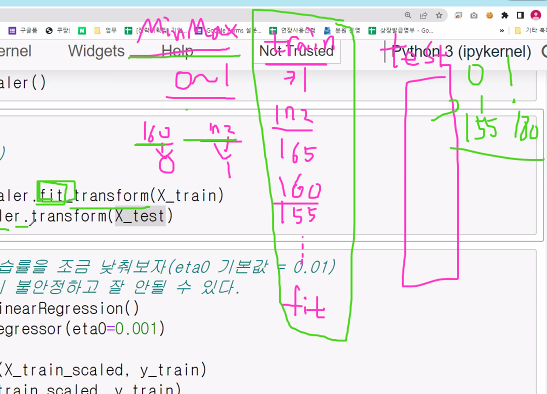

- 스케일링 시 훈련용 데이터만 fit 해줘야 한다
    - 기준이 달라지면 스케일링의 의미가 없음